In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('marketing_data.csv')
df.set_index('ID',drop = True,inplace = True)#make ID column the index because it is unioque
pd.options.display.max_columns = None #set jupyter notebook to display all the columns of the dataframe
df.head(5) #take a look at the top 5 entries of the Dataframe

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [6]:
df.columns #check if column names need cleaning

Index(['Year_Birth', 'Education', 'Marital_Status', ' Income ', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [7]:
df.rename(mapper = str.strip,axis = 'columns',inplace = True) #strip all column names of any unneccessary whitespaces

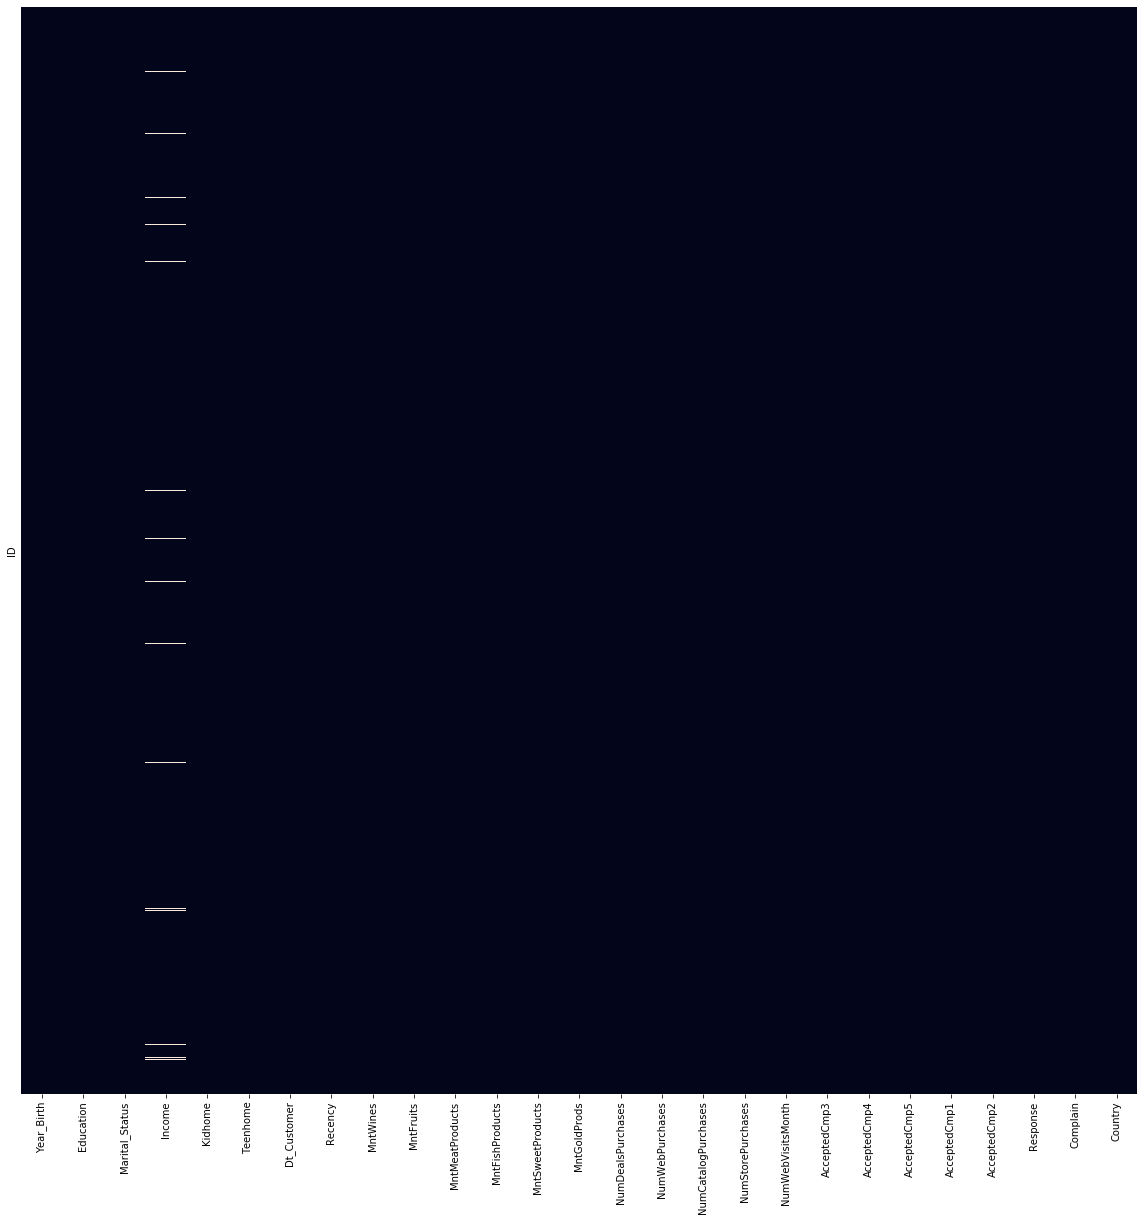

In [8]:
#visually check for any missing values
plt.subplots(figsize = (20,20))

sns.heatmap(df.isnull(),yticklabels = False,cbar = False)

plt.show()

In [9]:
df.isnull().sum()#check ecxact number of missing values

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [10]:
#check data type of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 1826 to 4070
Data columns (total 27 columns):
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
Income                 2216 non-null object
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null object
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 non-null int64
AcceptedCmp4           224

In [11]:
# the 'Income' column is not an int type and needs to be converted into one

def clean_money(x):
    
    a = int(x.split('$')[1].split(' ')[0].split('.')[0].replace(",", ""))
    return a
df['Income'] = df['Income'].dropna().apply(clean_money)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


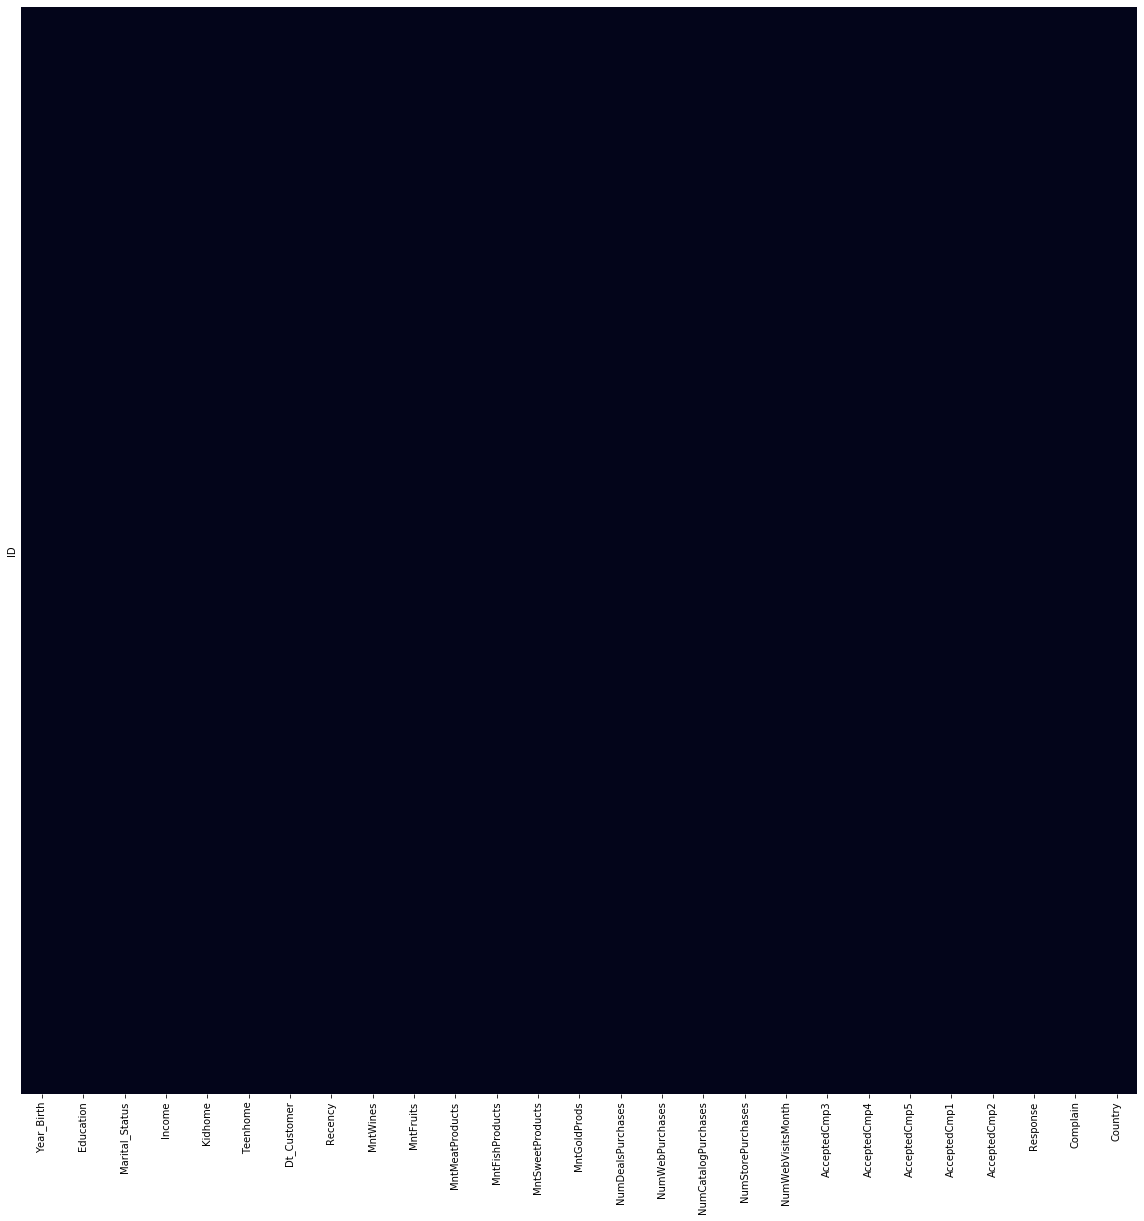

In [12]:
df['Income'].fillna(df['Income'].mean(), inplace = True) #fill all missing values in income column with mean

plt.subplots(figsize = (20,20))

sns.heatmap(df.isnull(),yticklabels = False,cbar = False)

plt.show()

In [13]:
#create new column with the ages of customers
def calculate_age(x):
    age = 2022 - x
    return age

df['Age'] = df['Year_Birth'].apply(calculate_age)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,52
1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,61
10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,64
1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,55
5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,33


In [14]:
#calculate the number of years a person has been a customer
def leangth_of_customer_registration(x):
    a  = int(x.split('/')[2])
    l_o_c = 22 - a
    return l_o_c

df['Length being a customer'] = df['Dt_Customer'].apply(leangth_of_customer_registration)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Length being a customer
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,52,8
1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,61,8
10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,64,8
1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,55,8
5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,33,8


In [15]:
#add column that segments by age
df['Age Segmentation'] = pd.cut(df['Age'], bins = [0,17,24,34,44,54,65,100], labels = ['Below 18 years','Between 18 and 24','Between 25 and 34','Between 35 and 44',
                                                                  'Between 45 and 54','Between 55 and 64', 'Above 65 years'])

In [16]:
#drop 'Year_Birth' and 'Dt_Customer' because i have extracted the necessary data from them

df.drop(['Year_Birth','Dt_Customer'],axis = 1,inplace = True)

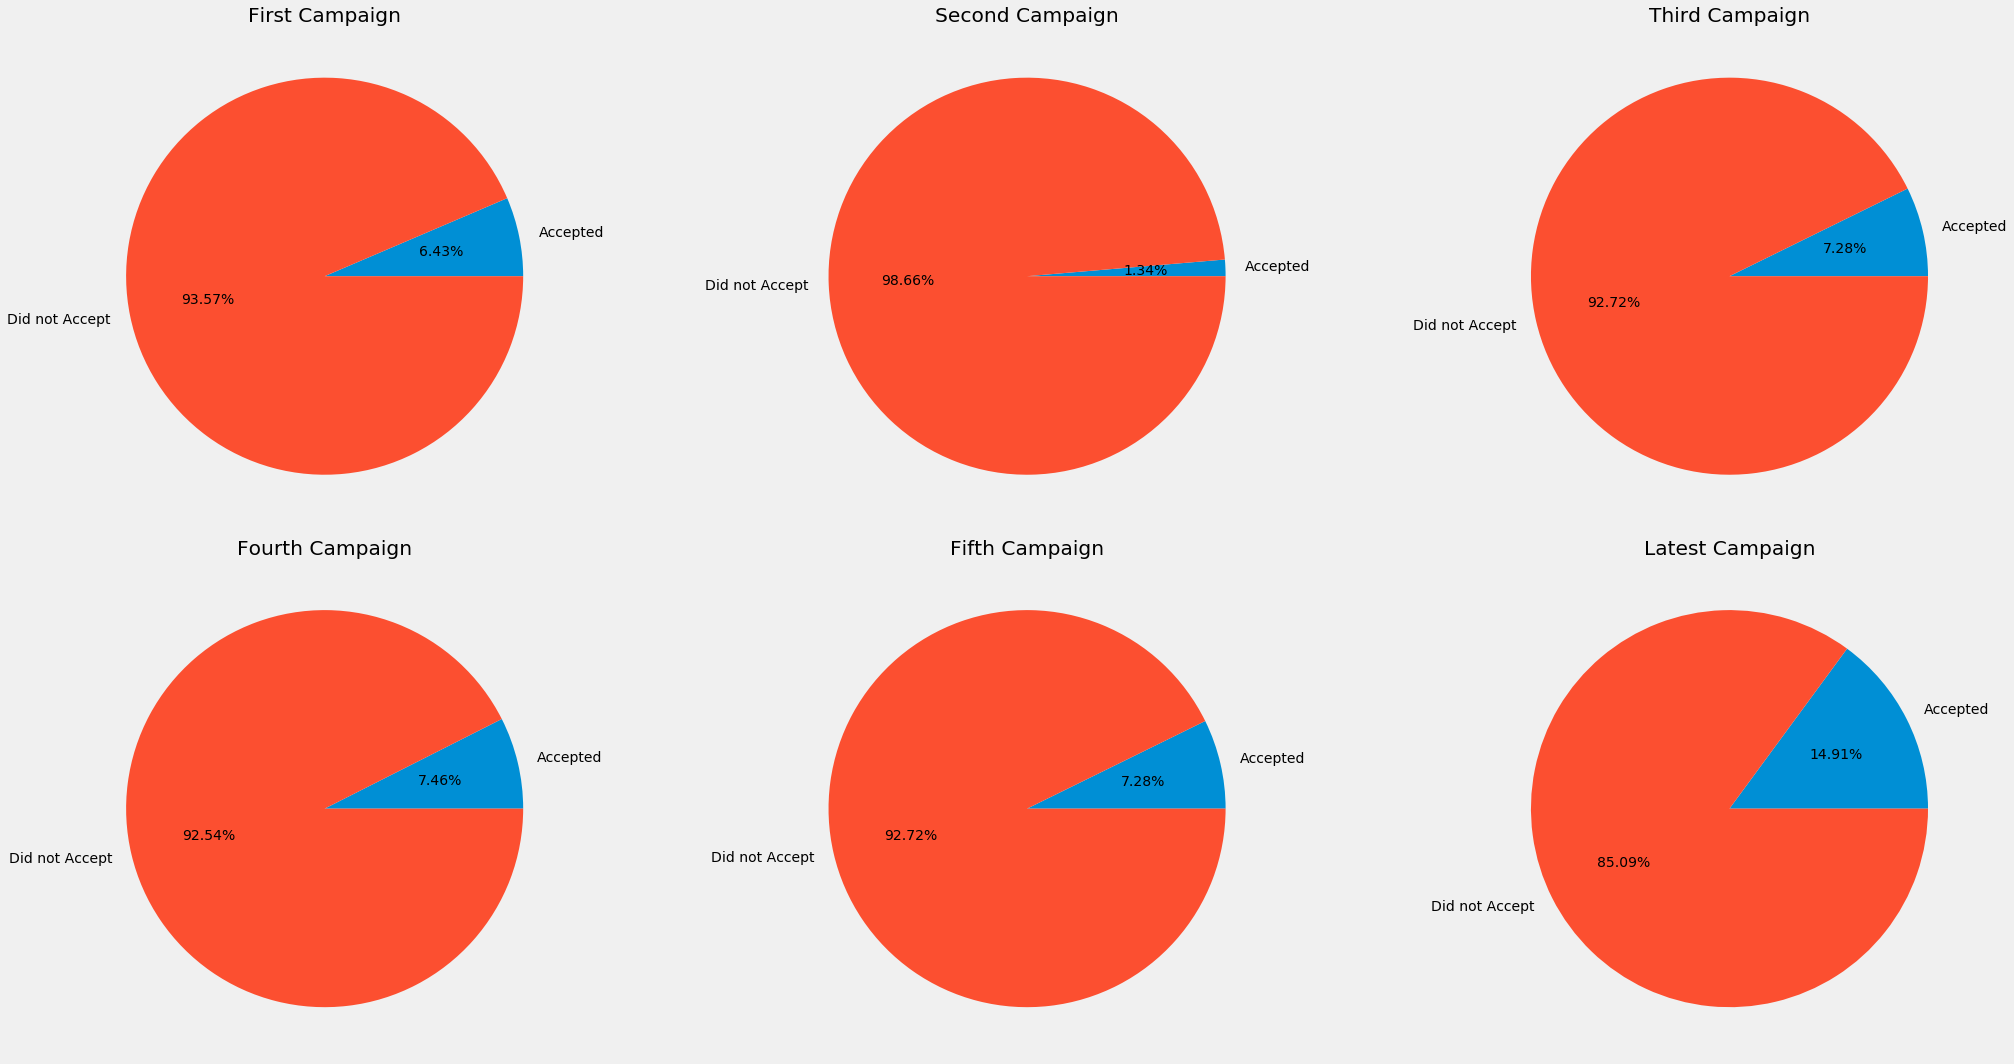

In [17]:
#check the performance of each campain in terms of who excepted the compain and who didn't
accepted_offer_1stcampain = len(df[df['AcceptedCmp1'] == 1])
accepted_offer_2ndcampain = len(df[df['AcceptedCmp2'] == 1])
accepted_offer_3rdcampain = len(df[df['AcceptedCmp3'] == 1])
accepted_offer_4thcampain = len(df[df['AcceptedCmp4'] == 1])
accepted_offer_5thtcampain = len(df[df['AcceptedCmp5'] == 1])
accepted_offer_lastCampain = len(df[df['Response'] == 1])

plt.style.use('fivethirtyeight')

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6))  = plt.subplots(2,3,figsize = (30,15))
ax1.pie([accepted_offer_1stcampain,(2240 - accepted_offer_1stcampain)], labels = ['Accepted','Did not Accept'],
        autopct='%1.2f%%')
ax2.pie([accepted_offer_2ndcampain,(2240 - accepted_offer_2ndcampain)], labels = ['Accepted','Did not Accept'],
        autopct='%1.2f%%')
ax3.pie([accepted_offer_3rdcampain,(2240 - accepted_offer_3rdcampain)], labels = ['Accepted','Did not Accept'],
        autopct='%1.2f%%')
ax4.pie([accepted_offer_4thcampain,(2240 - accepted_offer_4thcampain)], labels = ['Accepted','Did not Accept'],
        autopct='%1.2f%%')
ax5.pie([accepted_offer_5thtcampain,(2240 - accepted_offer_5thtcampain)], labels = ['Accepted','Did not Accept'],
        autopct='%1.2f%%')
ax6.pie([accepted_offer_lastCampain,(2240 - accepted_offer_lastCampain)], labels = ['Accepted','Did not Accept'],
        autopct='%1.2f%%')

ax1.title.set_text('First Campaign')
ax2.title.set_text('Second Campaign')
ax3.title.set_text('Third Campaign')
ax4.title.set_text('Fourth Campaign')
ax5.title.set_text('Fifth Campaign')
ax6.title.set_text('Latest Campaign')

plt.tight_layout()
plt.show()

In [18]:
df_accepted_offer_1stcampain = df[df['AcceptedCmp1'] == 1]

In [21]:
df_accepted_offer_1stcampain.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Age', 'Length being a customer',
       'Age Segmentation'],
      dtype='object')

In [30]:
df_accepted_offer_1stcampain['Teenhome'].value_counts()

0    115
1     27
2      2
Name: Teenhome, dtype: int64

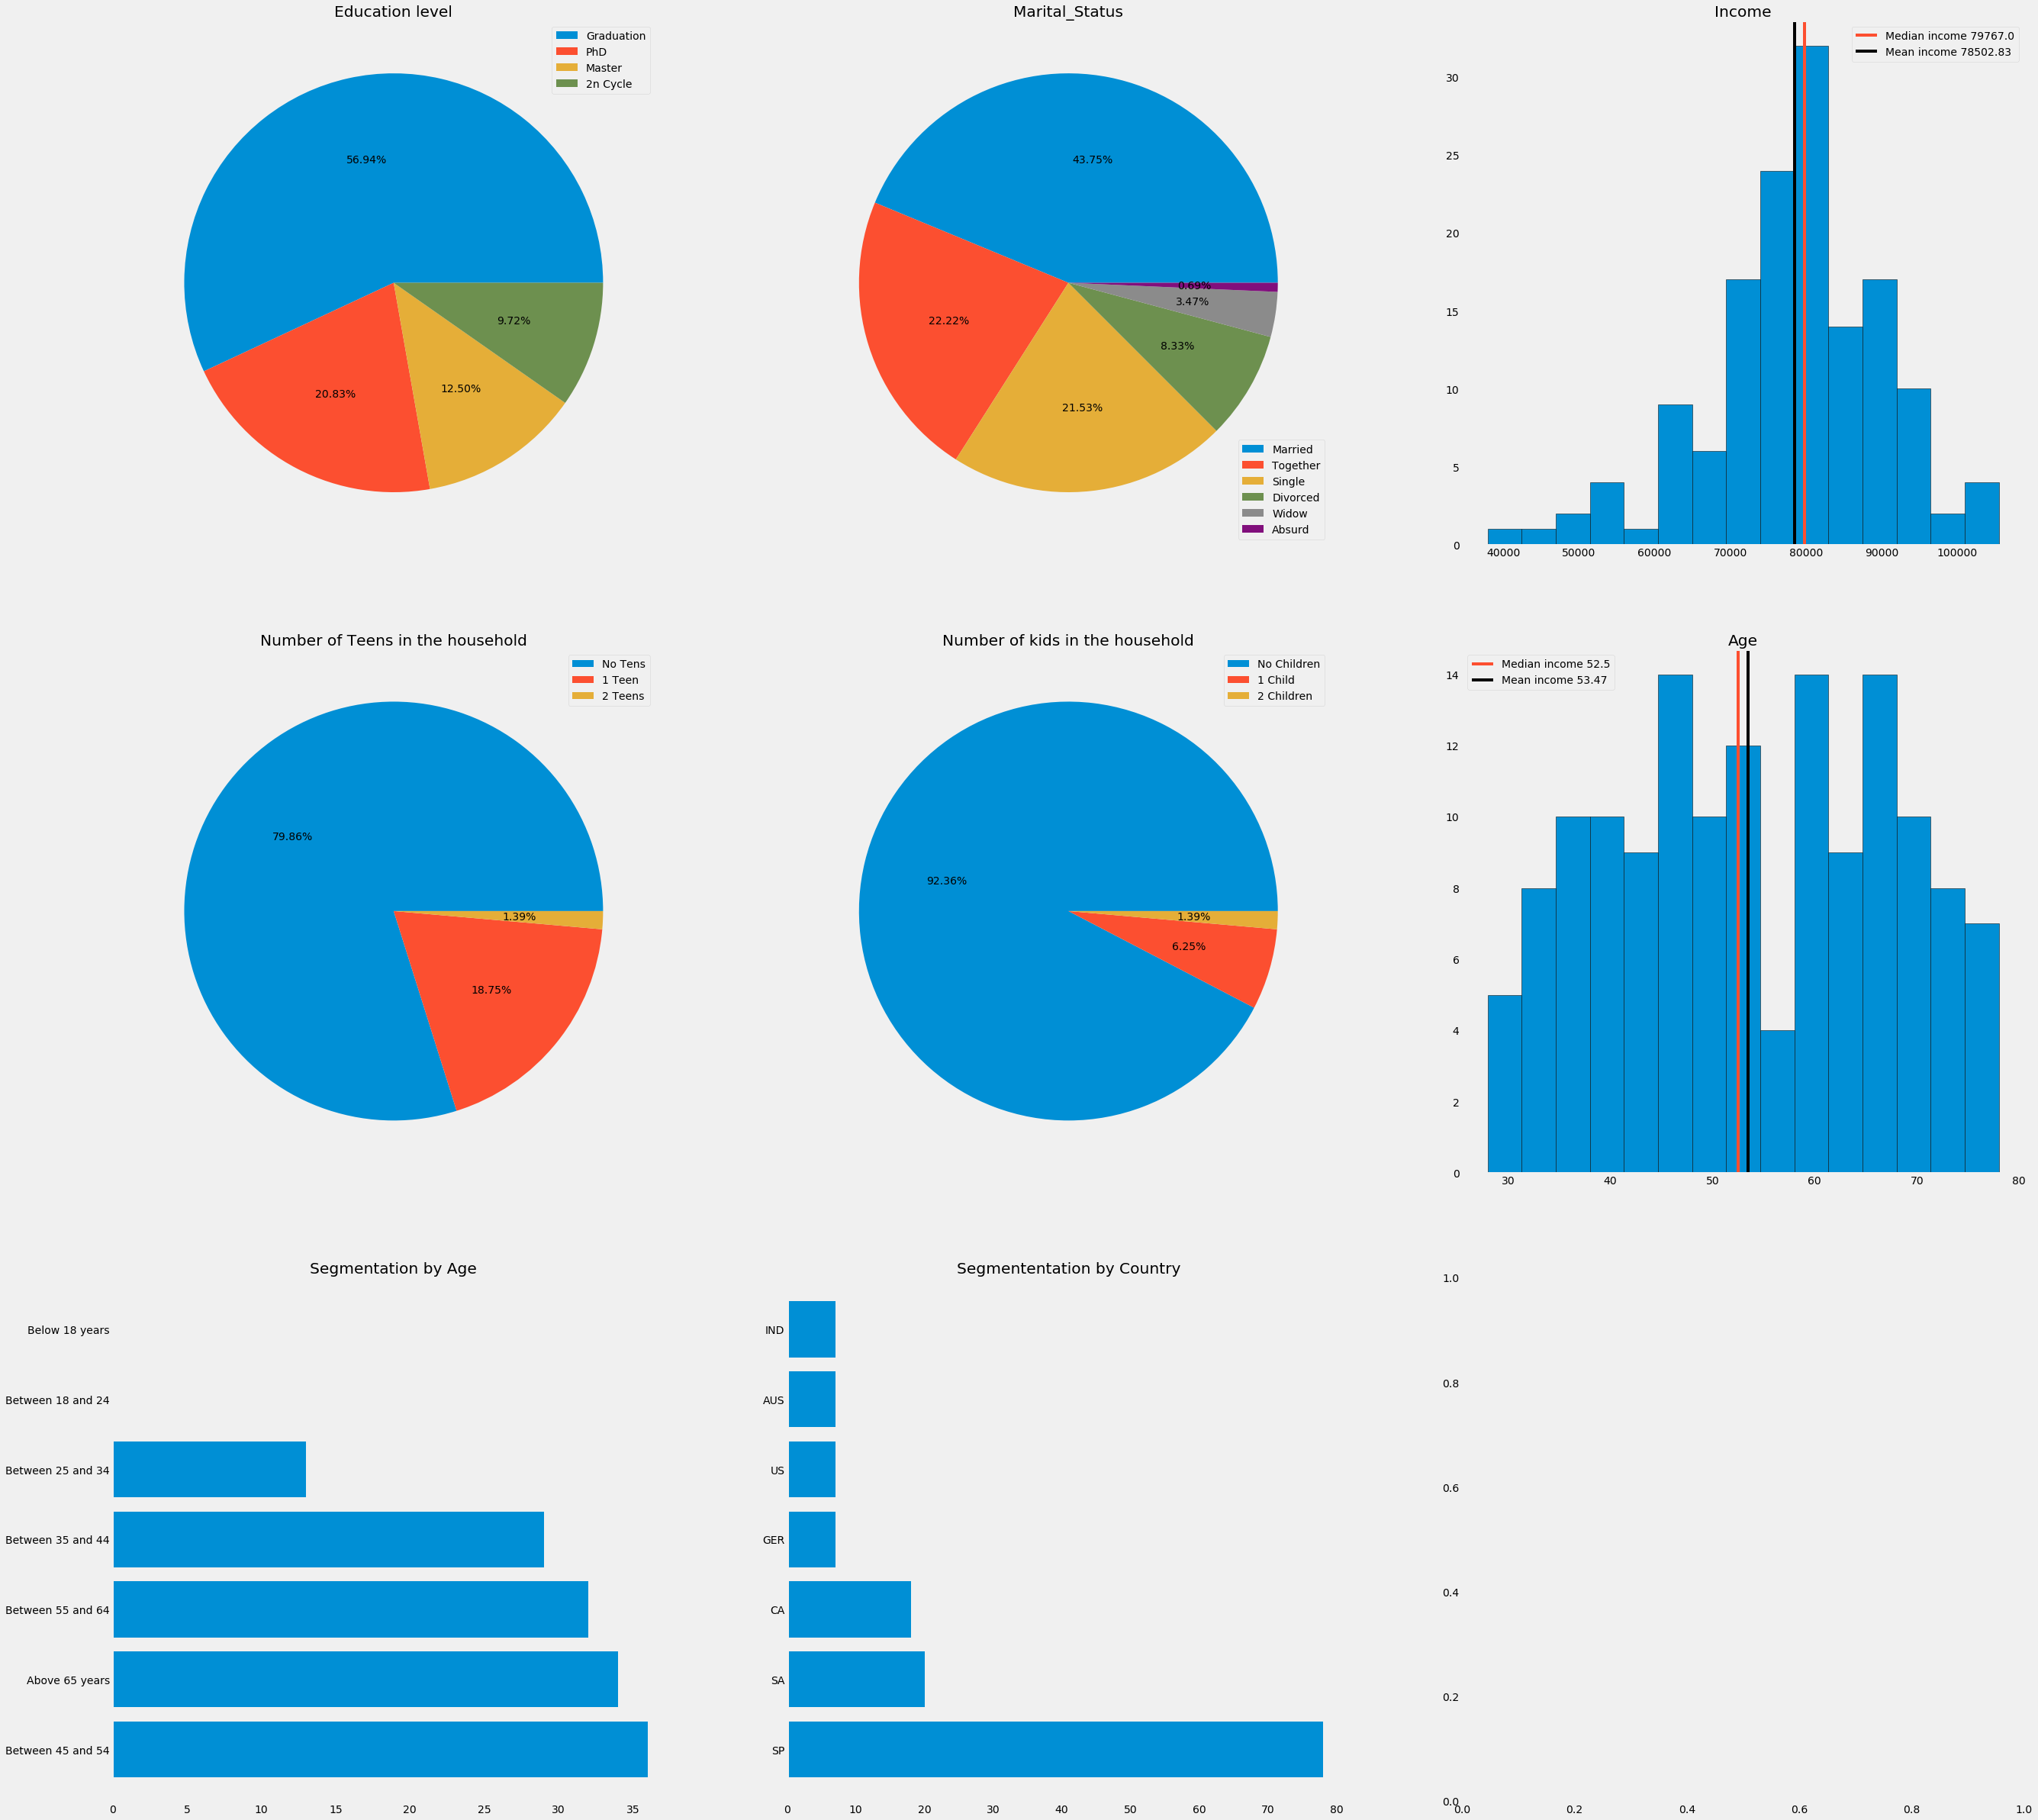

In [19]:
#checking the demographics for those who had a positive response for each campaign

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9))  = plt.subplots(3,3,figsize = (40,40))

ax1.pie(df_accepted_offer_1stcampain['Education'].value_counts().tolist(),
        labels = ['Graduation','PhD','Master','2n Cycle'],labeldistance=None,autopct='%1.2f%%')
ax1.legend()
ax1.title.set_text('Education level')

ax2.pie(df_accepted_offer_1stcampain['Marital_Status'].value_counts().tolist(),
        labels = ['Married','Together','Single','Divorced','Widow','Absurd'],labeldistance=None,autopct='%1.2f%%')
ax2.legend()
ax2.title.set_text('Marital_Status')

ax3.hist(df_accepted_offer_1stcampain['Income'],bins = 15,edgecolor = 'black')
ax3.axvline(df_accepted_offer_1stcampain['Income'].median(),color = '#fc4f30',
            label = 'Median income {}'.format(df_accepted_offer_1stcampain['Income'].median()))
ax3.axvline(df_accepted_offer_1stcampain['Income'].mean(),color = '#000000',
            label = 'Mean income {:.2f}'.format(df_accepted_offer_1stcampain['Income'].mean()))
ax3.title.set_text('Income')
ax3.legend()
ax3.grid()

ax4.pie(df_accepted_offer_1stcampain['Teenhome'].value_counts().tolist(),
        labels = ['No Tens','1 Teen','2 Teens'],labeldistance=None,autopct='%1.2f%%')
ax4.legend()
ax4.title.set_text('Number of Teens in the household')

ax5.pie(df_accepted_offer_1stcampain['Kidhome'].value_counts().tolist(),
        labels = ['No Children','1 Child','2 Children'],labeldistance=None,autopct='%1.2f%%')
ax5.legend()
ax5.title.set_text('Number of kids in the household')

ax6.hist(df_accepted_offer_1stcampain['Age'],bins = 15,edgecolor = 'black')
ax6.axvline(df_accepted_offer_1stcampain['Age'].median(),color = '#fc4f30',
            label = 'Median income {}'.format(df_accepted_offer_1stcampain['Age'].median()))
ax6.axvline(df_accepted_offer_1stcampain['Age'].mean(),color = '#000000',
            label = 'Mean income {:.2f}'.format(df_accepted_offer_1stcampain['Age'].mean()))
ax6.title.set_text('Age')
ax6.legend()
ax6.grid()

ax7.barh(df_accepted_offer_1stcampain['Age Segmentation'].value_counts().index,
         df_accepted_offer_1stcampain['Age Segmentation'].value_counts().values)
ax7.grid()
ax7.title.set_text('Segmentation by Age')


ax8.barh(df_accepted_offer_1stcampain['Country'].value_counts().index,
         df_accepted_offer_1stcampain['Country'].value_counts().values)
ax8.grid()
ax8.title.set_text('Segmententation by Country')


ax9.grid()

plt.show()

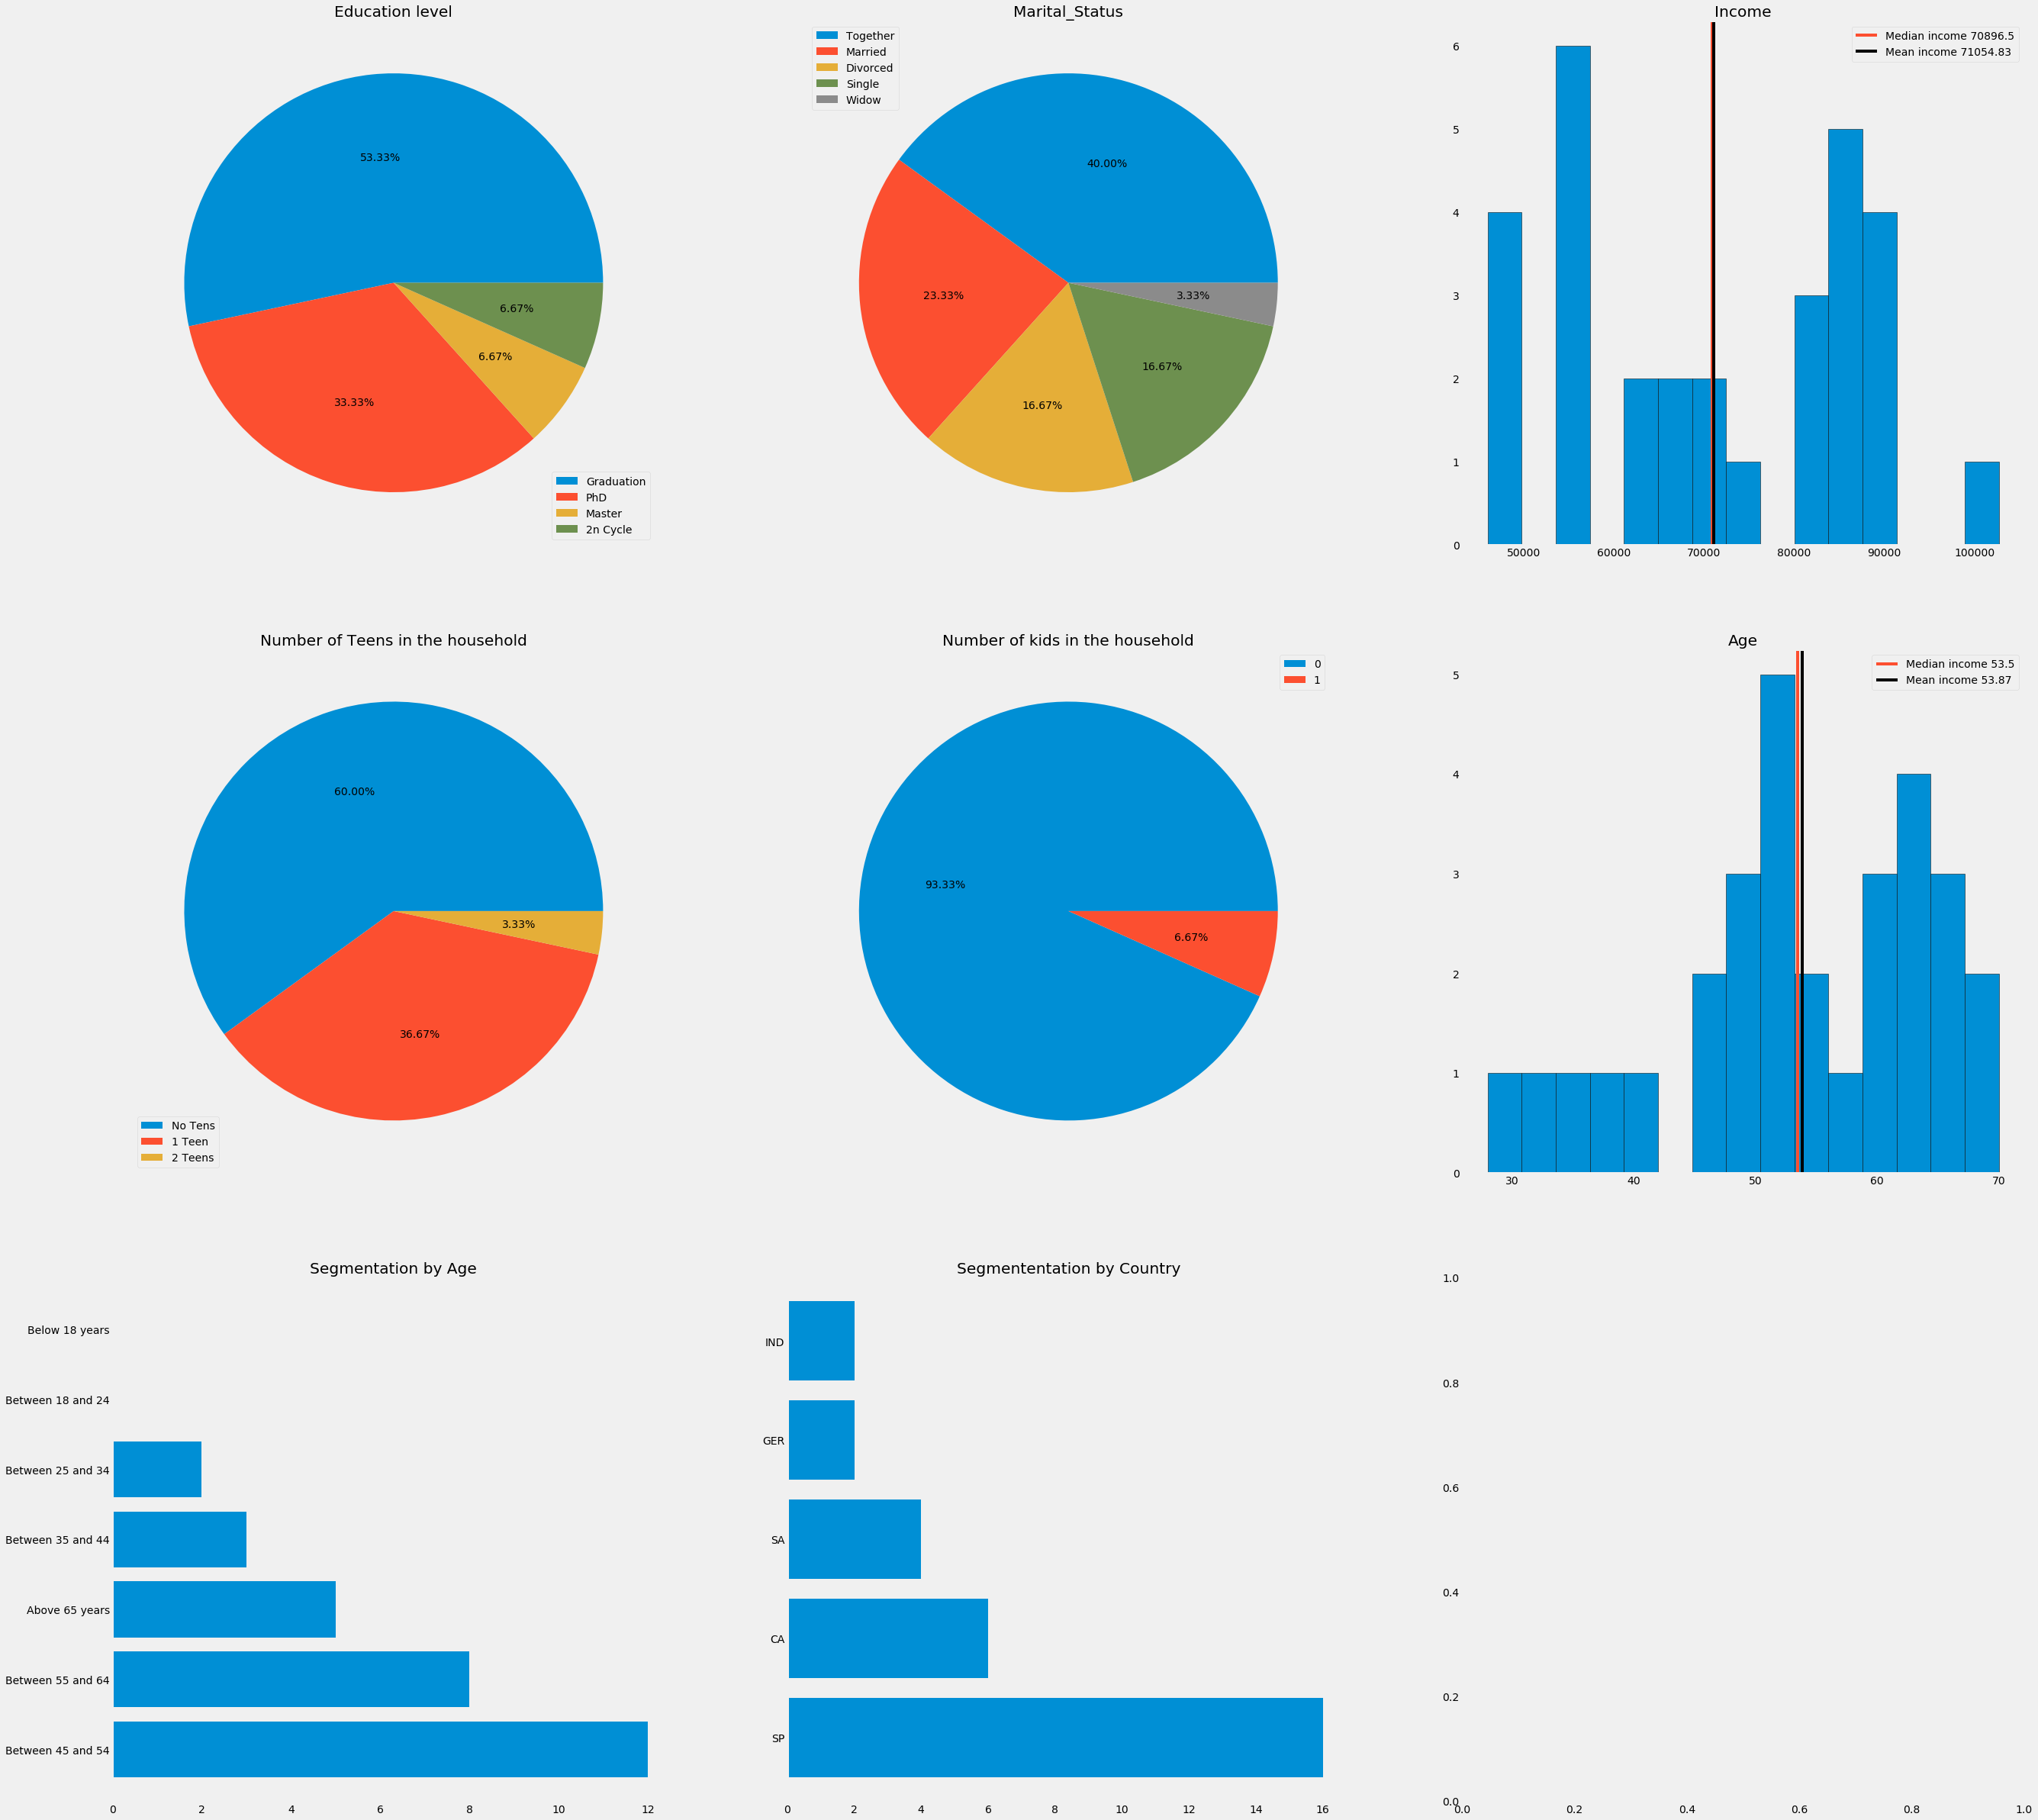

In [29]:
df_accepted_offer_2ndcampain = df[df['AcceptedCmp2'] == 1]

#checking the demographics for those who had a positive response for each campaign

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9))  = plt.subplots(3,3,figsize = (40,40))

ax1.pie(df_accepted_offer_2ndcampain['Education'].value_counts().tolist(),
        labels = ['Graduation','PhD','Master','2n Cycle'],labeldistance=None,autopct='%1.2f%%')
ax1.legend()
ax1.title.set_text('Education level')

ax2.pie(df_accepted_offer_2ndcampain['Marital_Status'].value_counts().tolist(),
        labels = df_accepted_offer_2ndcampain['Marital_Status'].value_counts().index.tolist(),labeldistance=None,autopct='%1.2f%%')
ax2.legend()
ax2.title.set_text('Marital_Status')

ax3.hist(df_accepted_offer_2ndcampain['Income'],bins = 15,edgecolor = 'black')
ax3.axvline(df_accepted_offer_2ndcampain['Income'].median(),color = '#fc4f30',
            label = 'Median income {}'.format(df_accepted_offer_2ndcampain['Income'].median()))
ax3.axvline(df_accepted_offer_2ndcampain['Income'].mean(),color = '#000000',
            label = 'Mean income {:.2f}'.format(df_accepted_offer_2ndcampain['Income'].mean()))
ax3.title.set_text('Income')
ax3.legend()
ax3.grid()

ax4.pie(df_accepted_offer_2ndcampain['Teenhome'].value_counts().tolist(),
        labels = ['No Tens','1 Teen','2 Teens'],labeldistance=None,autopct='%1.2f%%')
ax4.legend()
ax4.title.set_text('Number of Teens in the household')

ax5.pie(df_accepted_offer_2ndcampain['Kidhome'].value_counts().tolist(),
        labels = df_accepted_offer_2ndcampain['Kidhome'].value_counts().index.tolist(),labeldistance=None,autopct='%1.2f%%')
ax5.legend()
ax5.title.set_text('Number of kids in the household')

ax6.hist(df_accepted_offer_2ndcampain['Age'],bins = 15,edgecolor = 'black')
ax6.axvline(df_accepted_offer_2ndcampain['Age'].median(),color = '#fc4f30',
            label = 'Median income {}'.format(df_accepted_offer_2ndcampain['Age'].median()))
ax6.axvline(df_accepted_offer_2ndcampain['Age'].mean(),color = '#000000',
            label = 'Mean income {:.2f}'.format(df_accepted_offer_2ndcampain['Age'].mean()))
ax6.title.set_text('Age')
ax6.legend()
ax6.grid()

ax7.barh(df_accepted_offer_2ndcampain['Age Segmentation'].value_counts().index,
         df_accepted_offer_2ndcampain['Age Segmentation'].value_counts().values)
ax7.grid()
ax7.title.set_text('Segmentation by Age')


ax8.barh(df_accepted_offer_2ndcampain['Country'].value_counts().index,
         df_accepted_offer_2ndcampain['Country'].value_counts().values)
ax8.grid()
ax8.title.set_text('Segmententation by Country')


ax9.grid()

plt.show()

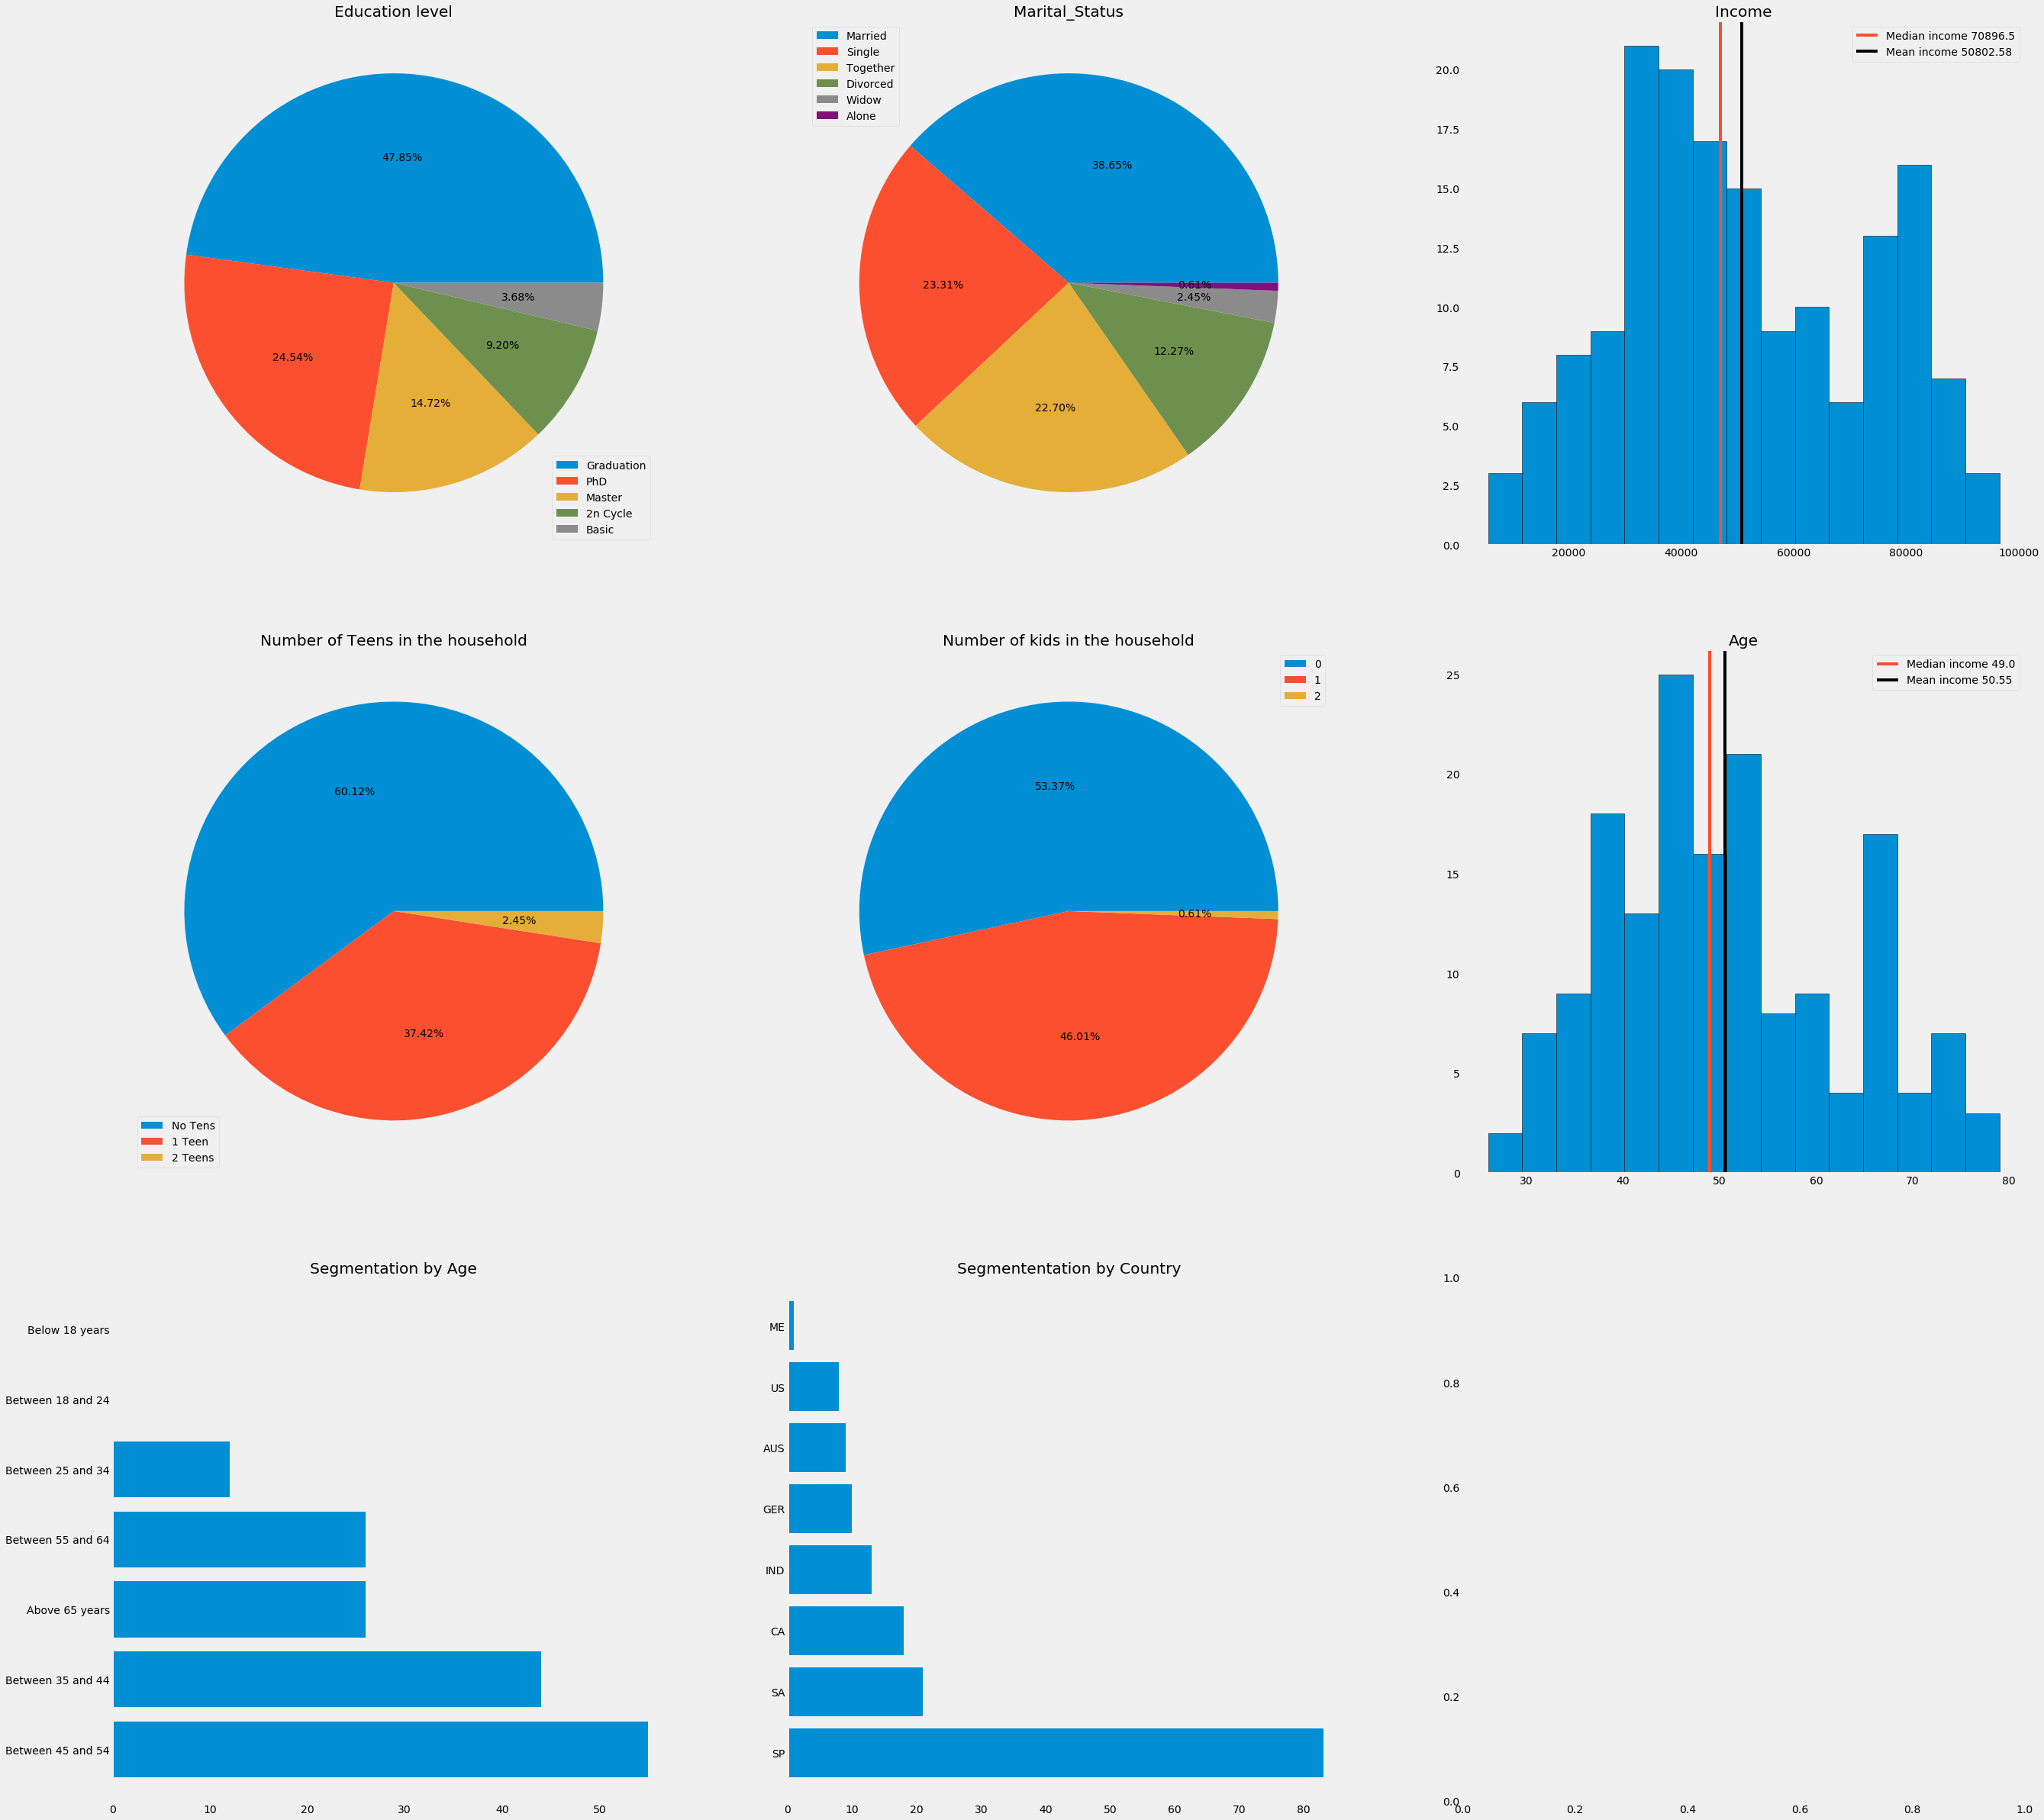

In [31]:
df_accepted_offer_3rdcampain = df[df['AcceptedCmp3'] == 1]

#checking the demographics for those who had a positive response for each campaign

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9))  = plt.subplots(3,3,figsize = (40,40))

ax1.pie(df_accepted_offer_3rdcampain['Education'].value_counts().tolist(),
        labels = df_accepted_offer_3rdcampain['Education'].value_counts().index.tolist(),labeldistance=None,autopct='%1.2f%%')
ax1.legend()
ax1.title.set_text('Education level')

ax2.pie(df_accepted_offer_3rdcampain['Marital_Status'].value_counts().tolist(),
        labels = df_accepted_offer_3rdcampain['Marital_Status'].value_counts().index.tolist(),labeldistance=None,autopct='%1.2f%%')
ax2.legend()
ax2.title.set_text('Marital_Status')

ax3.hist(df_accepted_offer_3rdcampain['Income'],bins = 15,edgecolor = 'black')
ax3.axvline(df_accepted_offer_3rdcampain['Income'].median(),color = '#fc4f30',
            label = 'Median income {}'.format(df_accepted_offer_2ndcampain['Income'].median()))
ax3.axvline(df_accepted_offer_3rdcampain['Income'].mean(),color = '#000000',
            label = 'Mean income {:.2f}'.format(df_accepted_offer_3rdcampain['Income'].mean()))
ax3.title.set_text('Income')
ax3.legend()
ax3.grid()

ax4.pie(df_accepted_offer_3rdcampain['Teenhome'].value_counts().tolist(),
        labels = ['No Tens','1 Teen','2 Teens'],labeldistance=None,autopct='%1.2f%%')
ax4.legend()
ax4.title.set_text('Number of Teens in the household')

ax5.pie(df_accepted_offer_3rdcampain['Kidhome'].value_counts().tolist(),
        labels = df_accepted_offer_3rdcampain['Kidhome'].value_counts().index.tolist(),labeldistance=None,autopct='%1.2f%%')
ax5.legend()
ax5.title.set_text('Number of kids in the household')

ax6.hist(df_accepted_offer_3rdcampain['Age'],bins = 15,edgecolor = 'black')
ax6.axvline(df_accepted_offer_3rdcampain['Age'].median(),color = '#fc4f30',
            label = 'Median income {}'.format(df_accepted_offer_3rdcampain['Age'].median()))
ax6.axvline(df_accepted_offer_3rdcampain['Age'].mean(),color = '#000000',
            label = 'Mean income {:.2f}'.format(df_accepted_offer_3rdcampain['Age'].mean()))
ax6.title.set_text('Age')
ax6.legend()
ax6.grid()

ax7.barh(df_accepted_offer_3rdcampain['Age Segmentation'].value_counts().index,
         df_accepted_offer_3rdcampain['Age Segmentation'].value_counts().values)
ax7.grid()
ax7.title.set_text('Segmentation by Age')


ax8.barh(df_accepted_offer_3rdcampain['Country'].value_counts().index,
         df_accepted_offer_3rdcampain['Country'].value_counts().values)
ax8.grid()
ax8.title.set_text('Segmententation by Country')


ax9.grid()

plt.show()

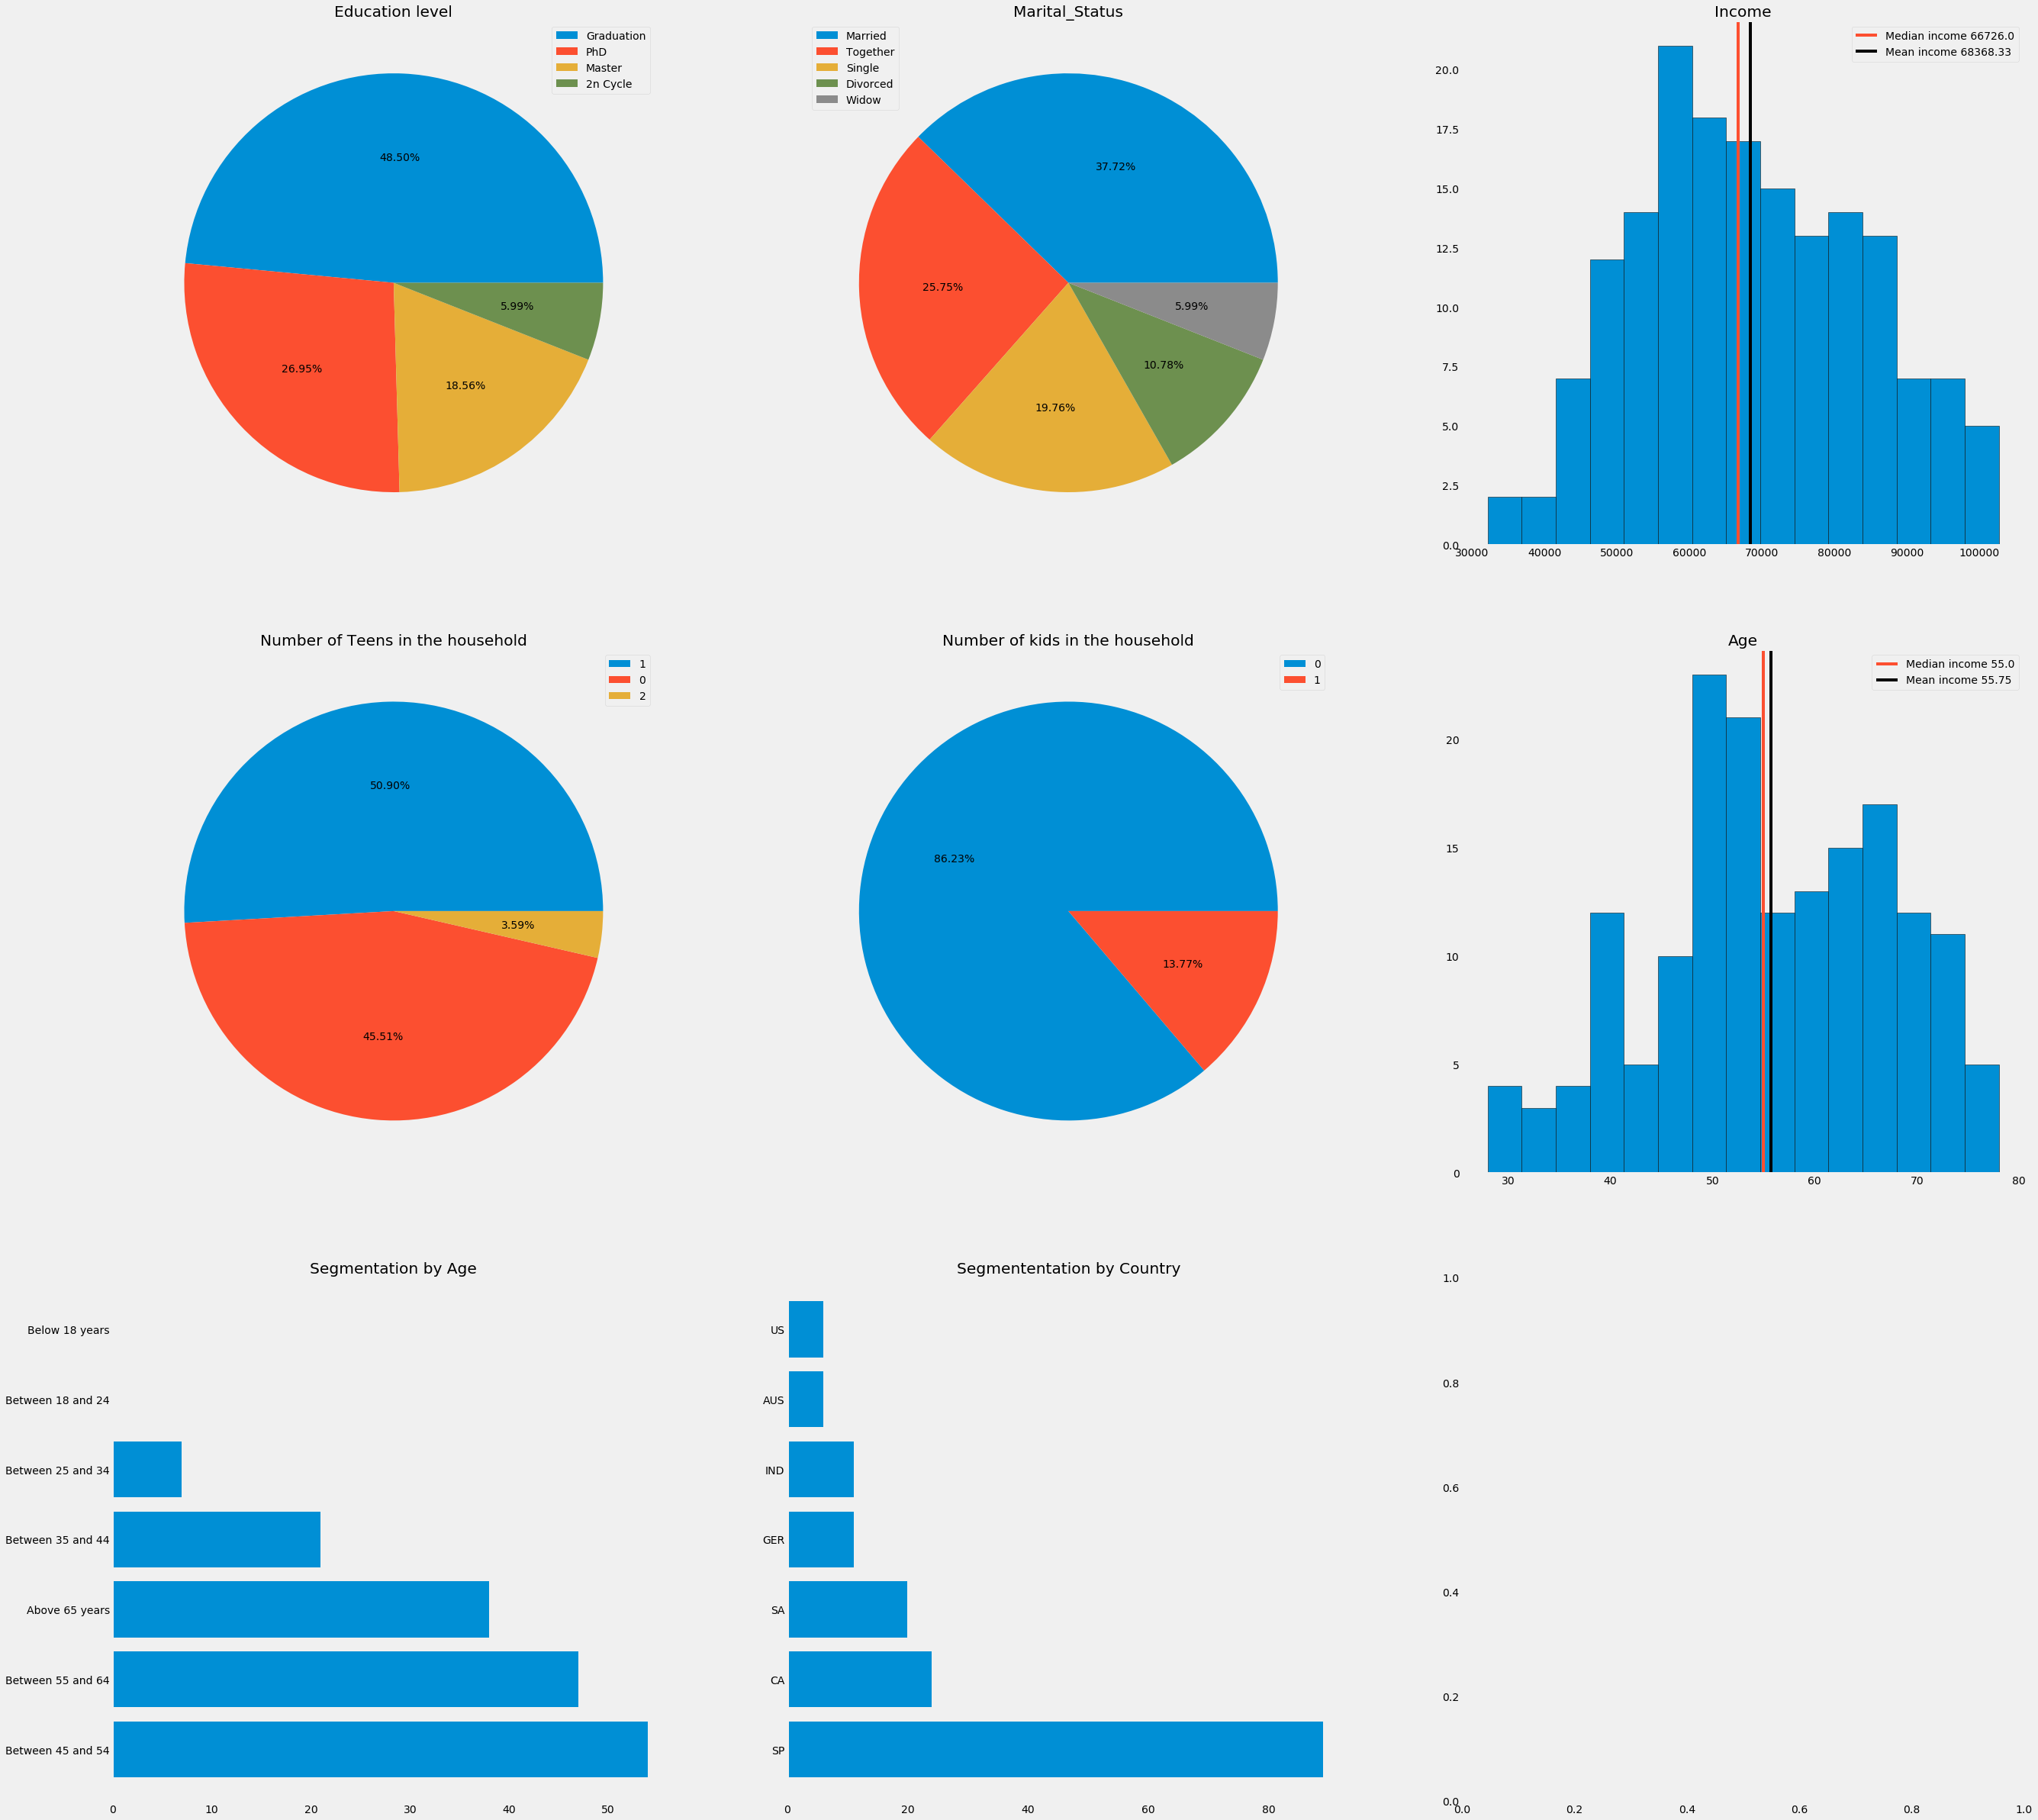

In [32]:
df_accepted_offer_4thcampain = df[df['AcceptedCmp4'] == 1]

#checking the demographics for those who had a positive response for each campaign

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9))  = plt.subplots(3,3,figsize = (40,40))

ax1.pie(df_accepted_offer_4thcampain['Education'].value_counts().tolist(),
        labels = df_accepted_offer_4thcampain['Education'].value_counts().index.tolist(),labeldistance=None,autopct='%1.2f%%')
ax1.legend()
ax1.title.set_text('Education level')

ax2.pie(df_accepted_offer_4thcampain['Marital_Status'].value_counts().tolist(),
        labels = df_accepted_offer_4thcampain['Marital_Status'].value_counts().index.tolist(),labeldistance=None,autopct='%1.2f%%')
ax2.legend()
ax2.title.set_text('Marital_Status')

ax3.hist(df_accepted_offer_4thcampain['Income'],bins = 15,edgecolor = 'black')
ax3.axvline(df_accepted_offer_4thcampain['Income'].median(),color = '#fc4f30',
            label = 'Median income {}'.format(df_accepted_offer_4thcampain['Income'].median()))
ax3.axvline(df_accepted_offer_4thcampain['Income'].mean(),color = '#000000',
            label = 'Mean income {:.2f}'.format(df_accepted_offer_4thcampain['Income'].mean()))
ax3.title.set_text('Income')
ax3.legend()
ax3.grid()

ax4.pie(df_accepted_offer_4thcampain['Teenhome'].value_counts().tolist(),
        labels = df_accepted_offer_4thcampain['Teenhome'].value_counts().index.tolist(),labeldistance=None,autopct='%1.2f%%')
ax4.legend()
ax4.title.set_text('Number of Teens in the household')

ax5.pie(df_accepted_offer_4thcampain['Kidhome'].value_counts().tolist(),
        labels = df_accepted_offer_4thcampain['Kidhome'].value_counts().index.tolist(),labeldistance=None,autopct='%1.2f%%')
ax5.legend()
ax5.title.set_text('Number of kids in the household')

ax6.hist(df_accepted_offer_4thcampain['Age'],bins = 15,edgecolor = 'black')
ax6.axvline(df_accepted_offer_4thcampain['Age'].median(),color = '#fc4f30',
            label = 'Median income {}'.format(df_accepted_offer_4thcampain['Age'].median()))
ax6.axvline(df_accepted_offer_4thcampain['Age'].mean(),color = '#000000',
            label = 'Mean income {:.2f}'.format(df_accepted_offer_4thcampain['Age'].mean()))
ax6.title.set_text('Age')
ax6.legend()
ax6.grid()

ax7.barh(df_accepted_offer_4thcampain['Age Segmentation'].value_counts().index,
         df_accepted_offer_4thcampain['Age Segmentation'].value_counts().values)
ax7.grid()
ax7.title.set_text('Segmentation by Age')


ax8.barh(df_accepted_offer_4thcampain['Country'].value_counts().index,
         df_accepted_offer_4thcampain['Country'].value_counts().values)
ax8.grid()
ax8.title.set_text('Segmententation by Country')


ax9.grid()

plt.show()

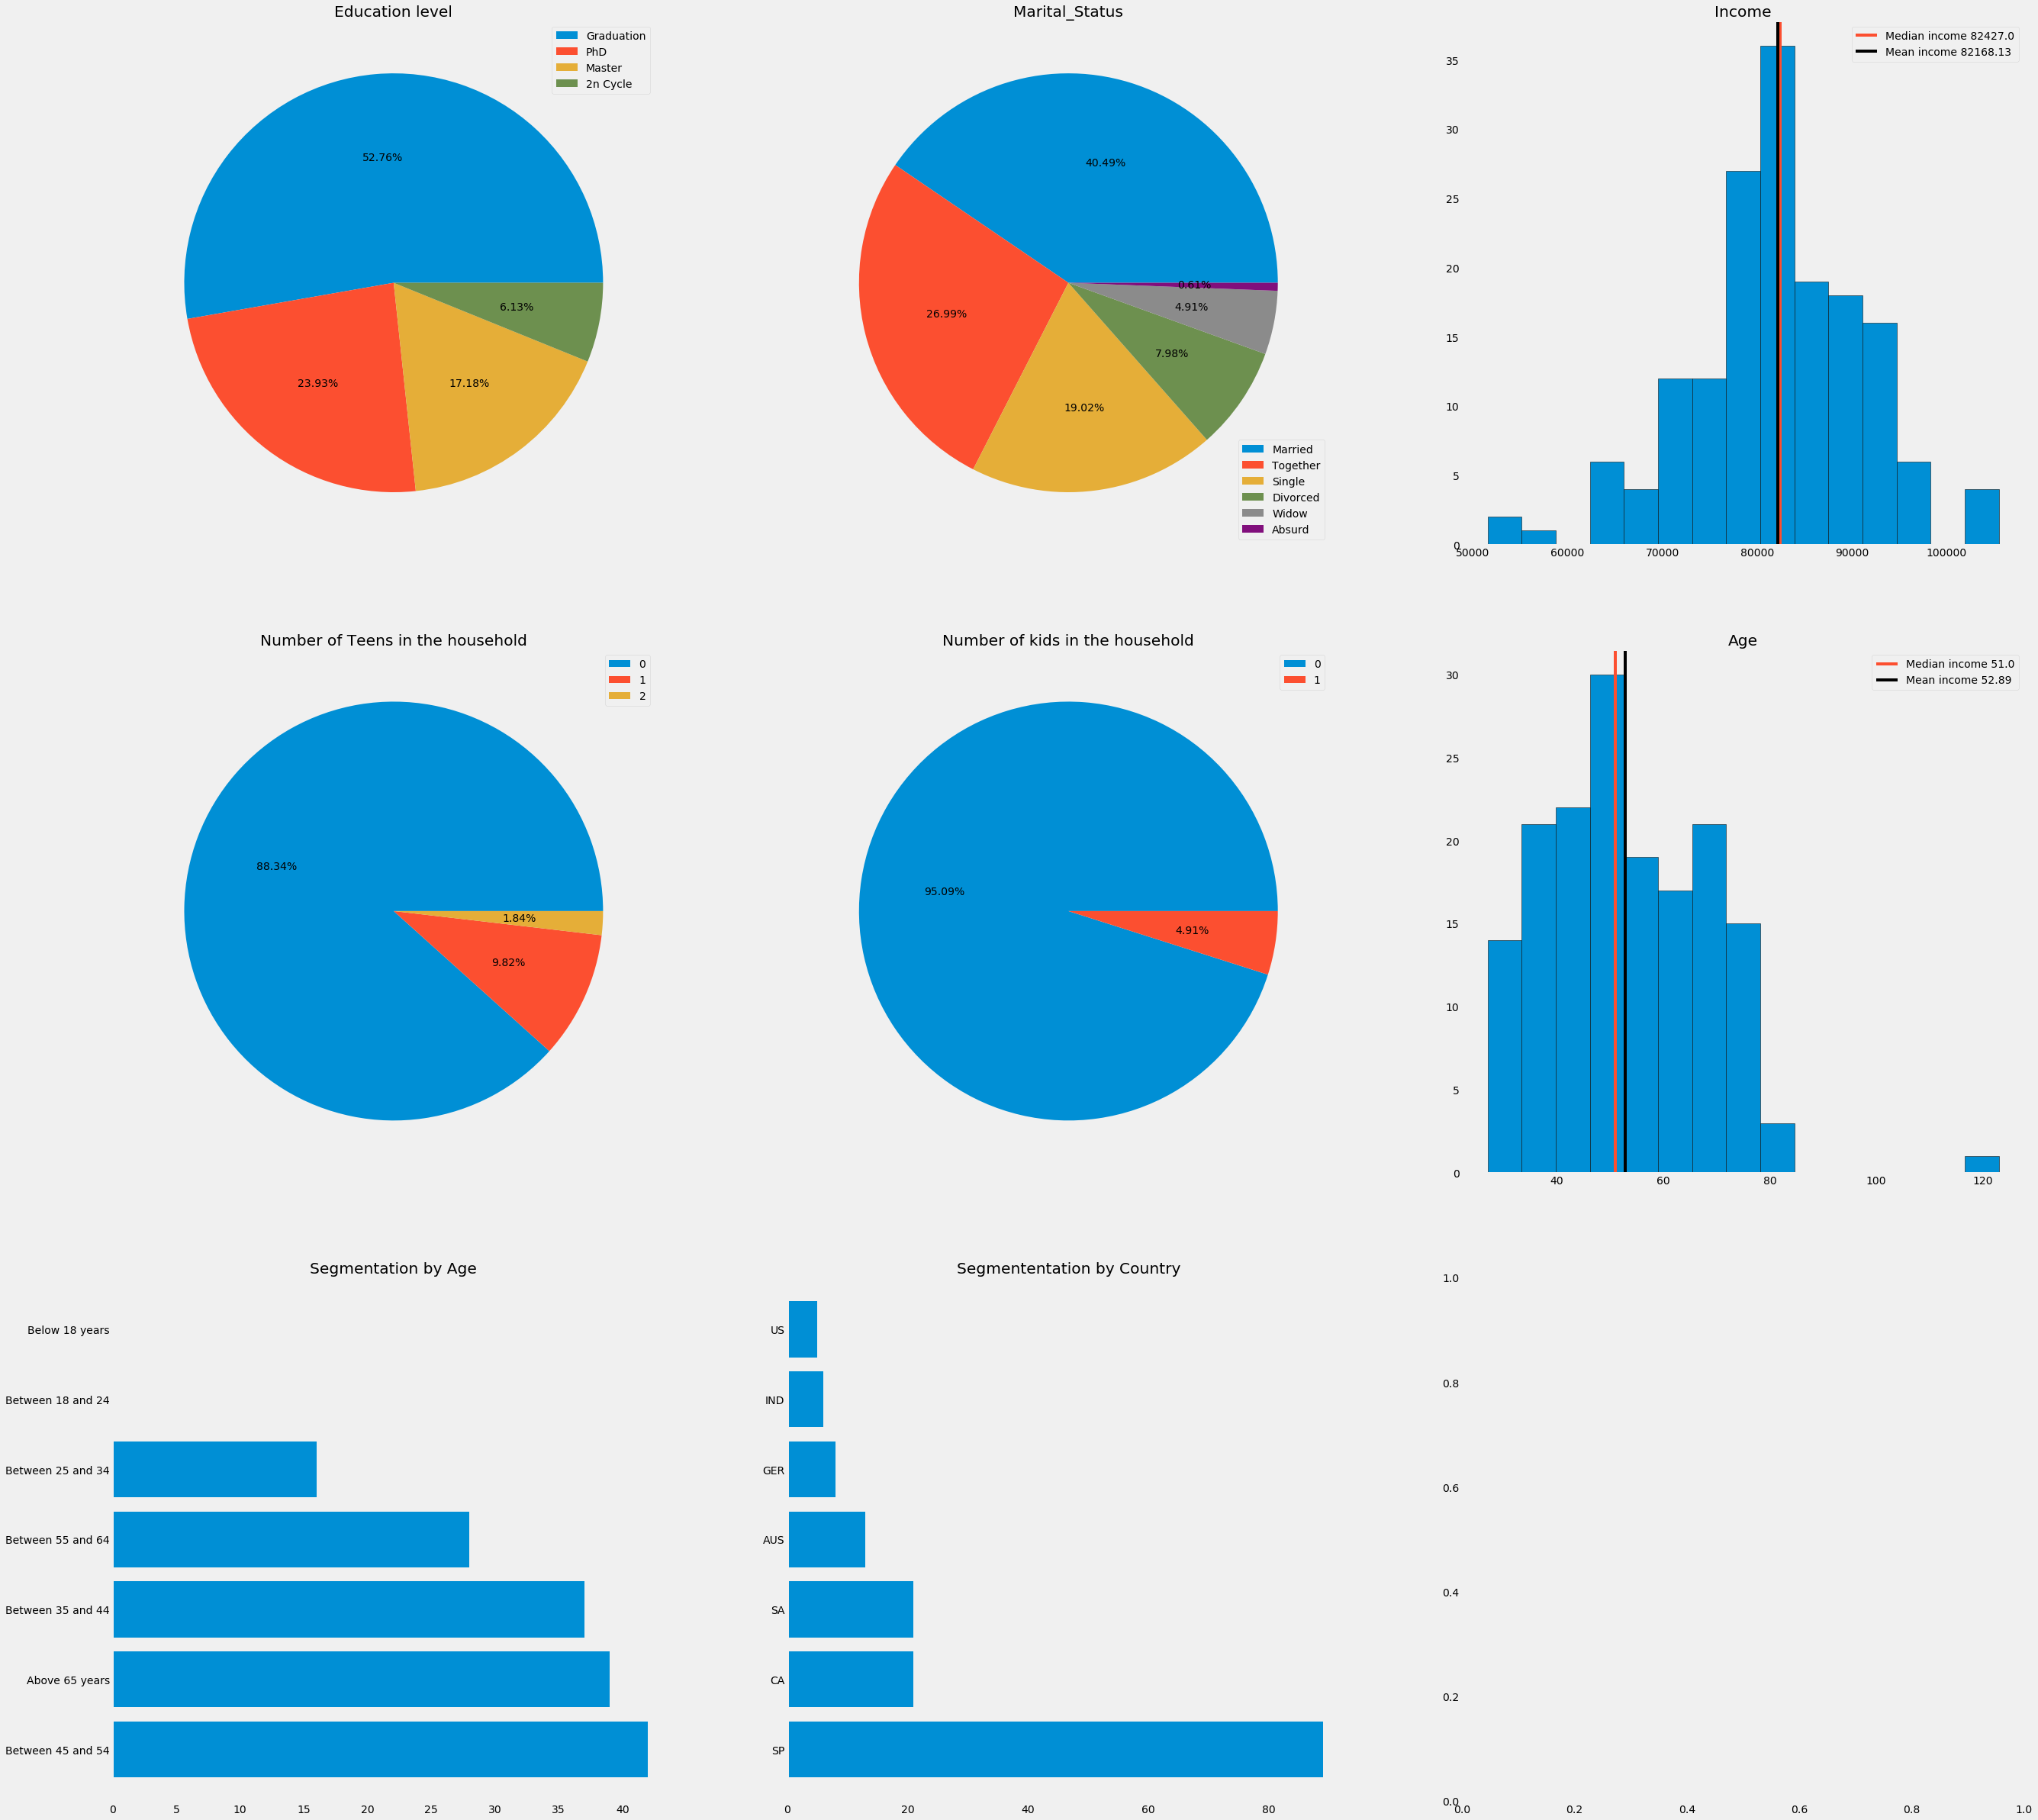

In [33]:
df_accepted_offer_5thcampain = df[df['AcceptedCmp5'] == 1]

#checking the demographics for those who had a positive response for each campaign

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9))  = plt.subplots(3,3,figsize = (40,40))

ax1.pie(df_accepted_offer_5thcampain['Education'].value_counts().tolist(),
        labels = df_accepted_offer_5thcampain['Education'].value_counts().index.tolist(),labeldistance=None,autopct='%1.2f%%')
ax1.legend()
ax1.title.set_text('Education level')

ax2.pie(df_accepted_offer_5thcampain['Marital_Status'].value_counts().tolist(),
        labels = df_accepted_offer_5thcampain['Marital_Status'].value_counts().index.tolist(),labeldistance=None,autopct='%1.2f%%')
ax2.legend()
ax2.title.set_text('Marital_Status')

ax3.hist(df_accepted_offer_5thcampain['Income'],bins = 15,edgecolor = 'black')
ax3.axvline(df_accepted_offer_5thcampain['Income'].median(),color = '#fc4f30',
            label = 'Median income {}'.format(df_accepted_offer_5thcampain['Income'].median()))
ax3.axvline(df_accepted_offer_5thcampain['Income'].mean(),color = '#000000',
            label = 'Mean income {:.2f}'.format(df_accepted_offer_5thcampain['Income'].mean()))
ax3.title.set_text('Income')
ax3.legend()
ax3.grid()

ax4.pie(df_accepted_offer_5thcampain['Teenhome'].value_counts().tolist(),
        labels = df_accepted_offer_5thcampain['Teenhome'].value_counts().index.tolist(),labeldistance=None,autopct='%1.2f%%')
ax4.legend()
ax4.title.set_text('Number of Teens in the household')

ax5.pie(df_accepted_offer_5thcampain['Kidhome'].value_counts().tolist(),
        labels = df_accepted_offer_5thcampain['Kidhome'].value_counts().index.tolist(),labeldistance=None,autopct='%1.2f%%')
ax5.legend()
ax5.title.set_text('Number of kids in the household')

ax6.hist(df_accepted_offer_5thcampain['Age'],bins = 15,edgecolor = 'black')
ax6.axvline(df_accepted_offer_5thcampain['Age'].median(),color = '#fc4f30',
            label = 'Median income {}'.format(df_accepted_offer_5thcampain['Age'].median()))
ax6.axvline(df_accepted_offer_5thcampain['Age'].mean(),color = '#000000',
            label = 'Mean income {:.2f}'.format(df_accepted_offer_5thcampain['Age'].mean()))
ax6.title.set_text('Age')
ax6.legend()
ax6.grid()

ax7.barh(df_accepted_offer_5thcampain['Age Segmentation'].value_counts().index,
         df_accepted_offer_5thcampain['Age Segmentation'].value_counts().values)
ax7.grid()
ax7.title.set_text('Segmentation by Age')


ax8.barh(df_accepted_offer_5thcampain['Country'].value_counts().index,
         df_accepted_offer_5thcampain['Country'].value_counts().values)
ax8.grid()
ax8.title.set_text('Segmententation by Country')


ax9.grid()

plt.show()

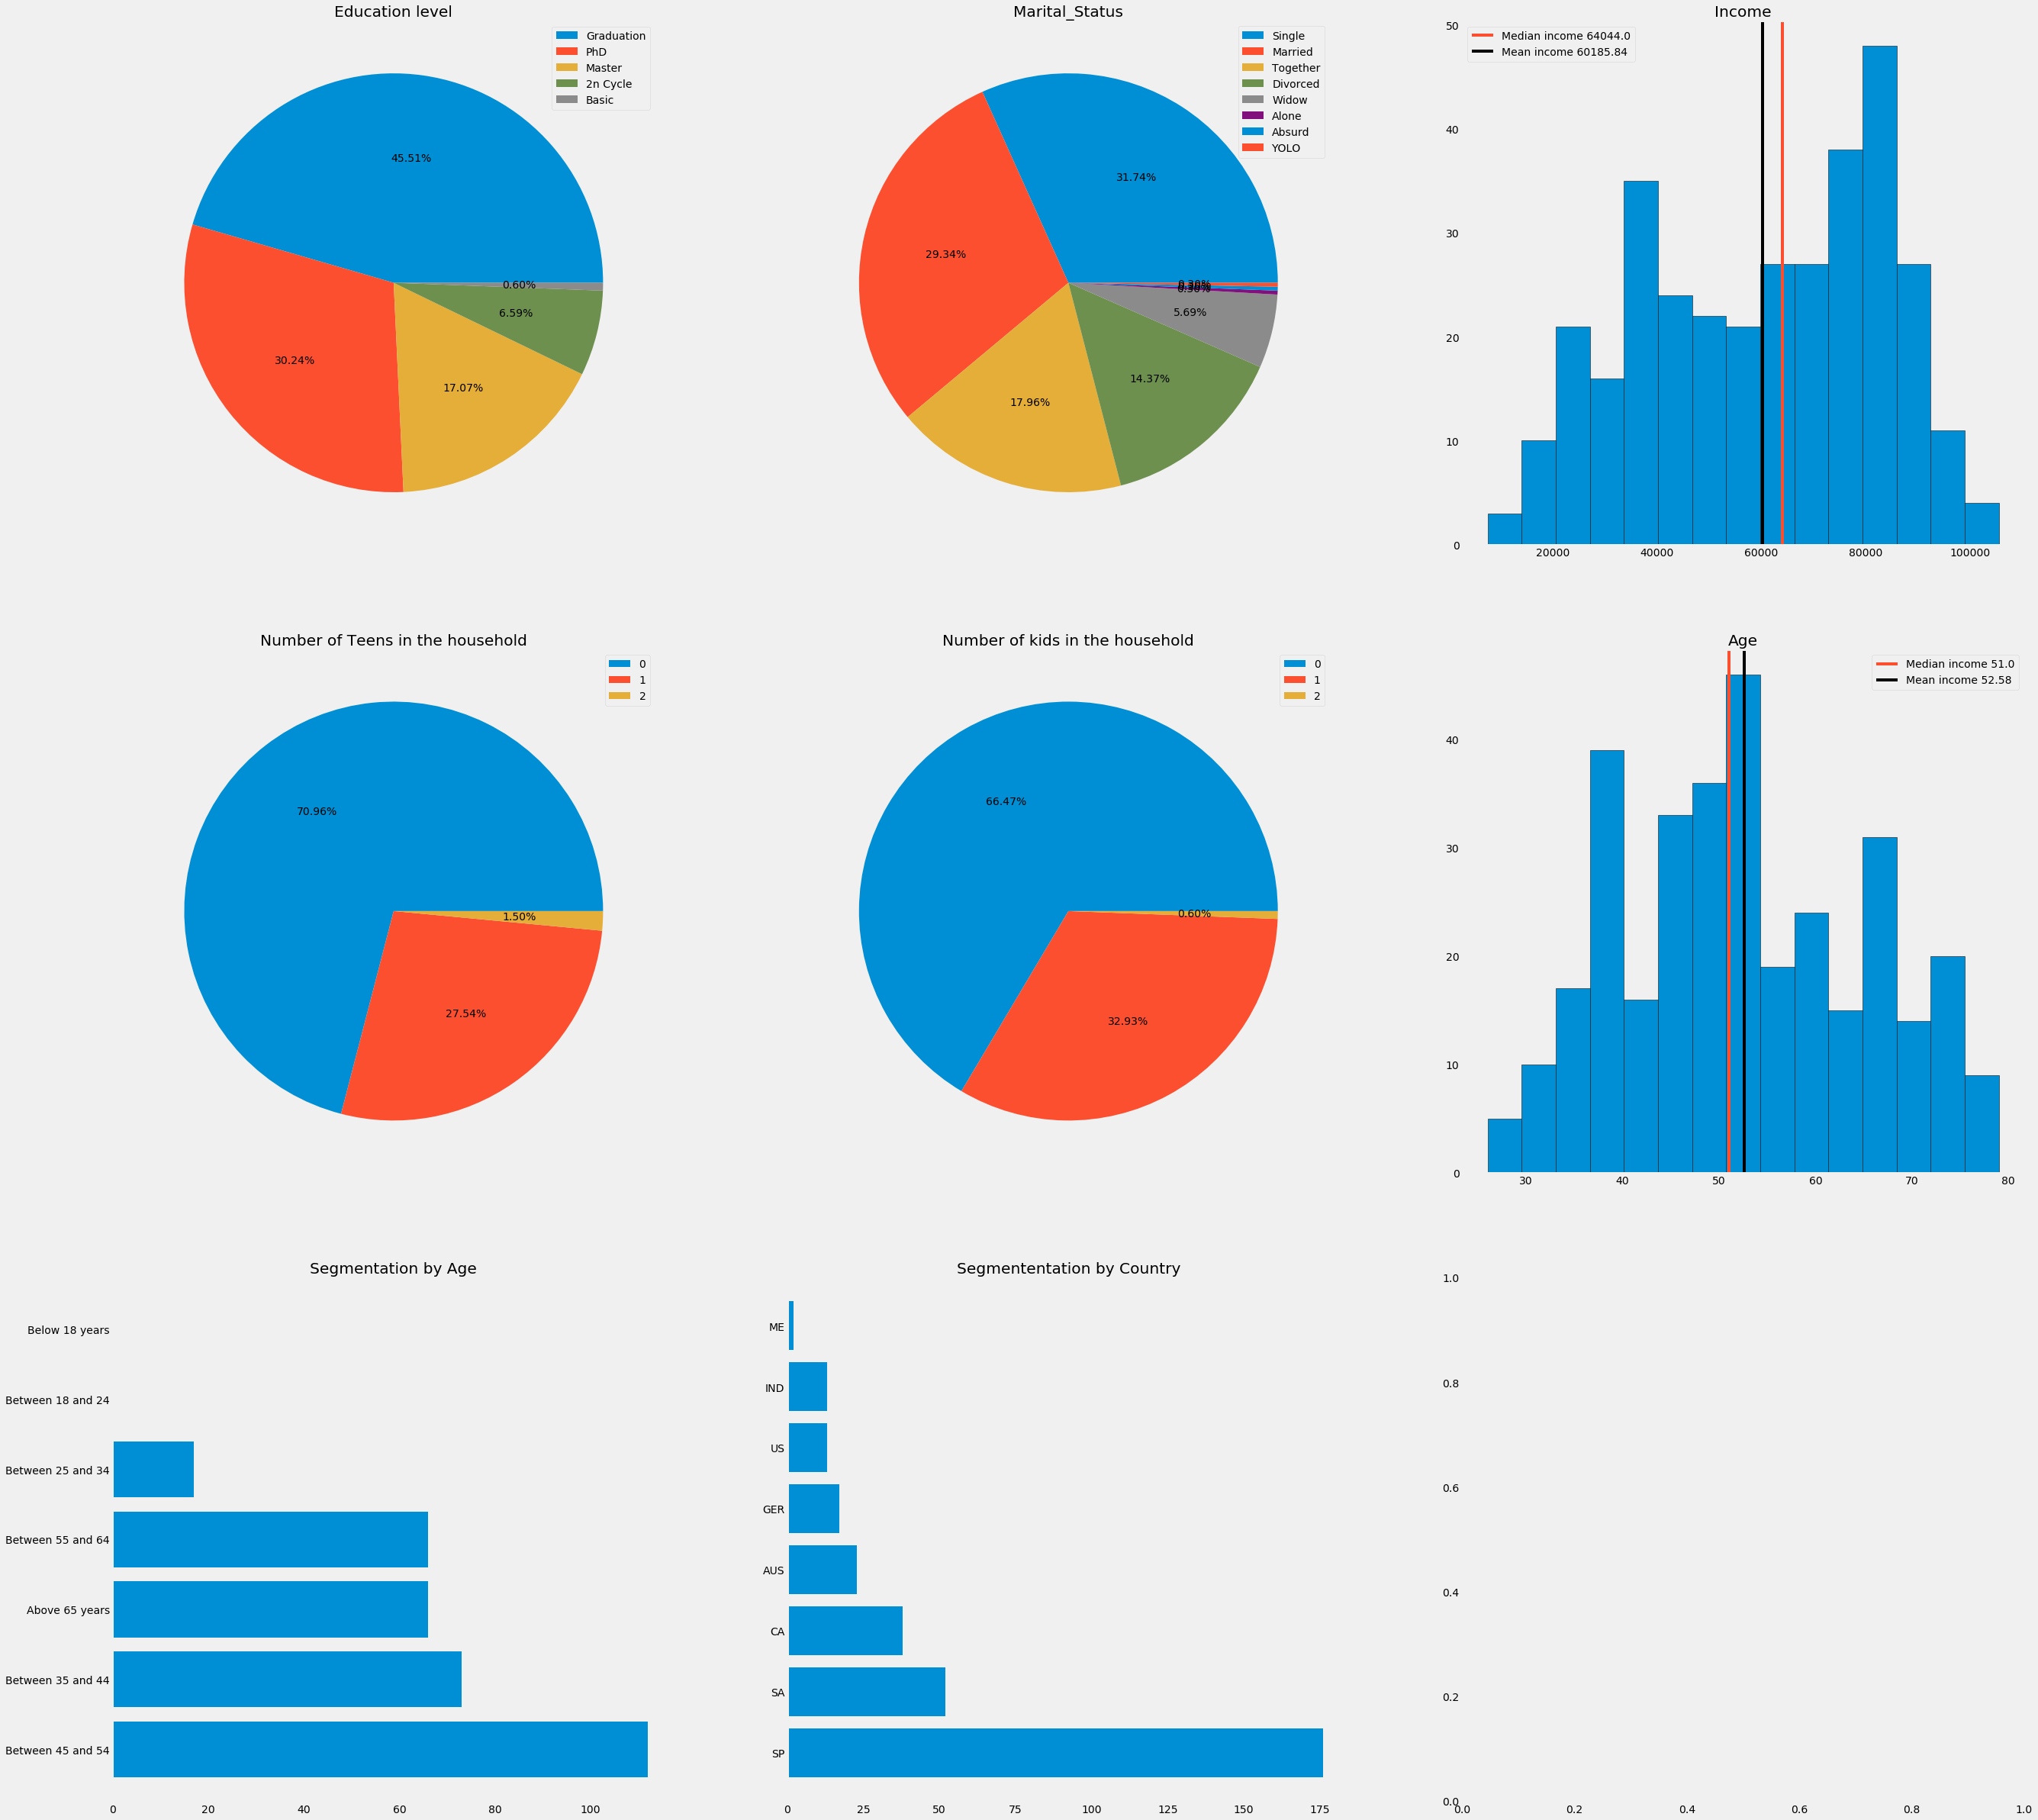

In [35]:
df_accepted_offer_latestcampain = df[df['Response'] == 1]

#checking the demographics for those who had a positive response for each campaign

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9))  = plt.subplots(3,3,figsize = (40,40))

ax1.pie(df_accepted_offer_latestcampain['Education'].value_counts().tolist(),
        labels = df_accepted_offer_latestcampain['Education'].value_counts().index.tolist(),labeldistance=None,autopct='%1.2f%%')
ax1.legend()
ax1.title.set_text('Education level')

ax2.pie(df_accepted_offer_latestcampain['Marital_Status'].value_counts().tolist(),
        labels = df_accepted_offer_latestcampain['Marital_Status'].value_counts().index.tolist(),labeldistance=None,autopct='%1.2f%%')
ax2.legend()
ax2.title.set_text('Marital_Status')

ax3.hist(df_accepted_offer_latestcampain['Income'],bins = 15,edgecolor = 'black')
ax3.axvline(df_accepted_offer_latestcampain['Income'].median(),color = '#fc4f30',
            label = 'Median income {}'.format(df_accepted_offer_latestcampain['Income'].median()))
ax3.axvline(df_accepted_offer_latestcampain['Income'].mean(),color = '#000000',
            label = 'Mean income {:.2f}'.format(df_accepted_offer_latestcampain['Income'].mean()))
ax3.title.set_text('Income')
ax3.legend()
ax3.grid()

ax4.pie(df_accepted_offer_latestcampain['Teenhome'].value_counts().tolist(),
        labels = df_accepted_offer_latestcampain['Teenhome'].value_counts().index.tolist(),labeldistance=None,autopct='%1.2f%%')
ax4.legend()
ax4.title.set_text('Number of Teens in the household')

ax5.pie(df_accepted_offer_latestcampain['Kidhome'].value_counts().tolist(),
        labels = df_accepted_offer_latestcampain['Kidhome'].value_counts().index.tolist(),labeldistance=None,autopct='%1.2f%%')
ax5.legend()
ax5.title.set_text('Number of kids in the household')

ax6.hist(df_accepted_offer_latestcampain['Age'],bins = 15,edgecolor = 'black')
ax6.axvline(df_accepted_offer_latestcampain['Age'].median(),color = '#fc4f30',
            label = 'Median income {}'.format(df_accepted_offer_latestcampain['Age'].median()))
ax6.axvline(df_accepted_offer_latestcampain['Age'].mean(),color = '#000000',
            label = 'Mean income {:.2f}'.format(df_accepted_offer_latestcampain['Age'].mean()))
ax6.title.set_text('Age')
ax6.legend()
ax6.grid()

ax7.barh(df_accepted_offer_latestcampain['Age Segmentation'].value_counts().index,
         df_accepted_offer_latestcampain['Age Segmentation'].value_counts().values)
ax7.grid()
ax7.title.set_text('Segmentation by Age')


ax8.barh(df_accepted_offer_latestcampain['Country'].value_counts().index,
         df_accepted_offer_latestcampain['Country'].value_counts().values)
ax8.grid()
ax8.title.set_text('Segmententation by Country')


ax9.grid()

plt.show()